# Import all necessary libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the Dataset

In [3]:
df=pd.read_csv("Titanic.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Removing unnecessary Rows

In [6]:
df.drop(columns=["Cabin", "Ticket", "Name"], inplace=True)

In [7]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


# Filling the Missing Values

In [8]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [9]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [10]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [11]:
df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [12]:
df.Embarked.mode().index

RangeIndex(start=0, stop=1, step=1)

In [13]:
df.Embarked.mode().values

array(['S'], dtype=object)

In [14]:
df.Embarked.mode().values[0]

'S'

In [15]:
df.Embarked.fillna(df.Embarked.mode().values[0],inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_12848\4182082534.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Embarked.fillna(df.Embarked.mode().values[0],inplace=True)


In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Visualisation

In [17]:
# Seaborn style
sns.set(style="whitegrid", palette="pastel")

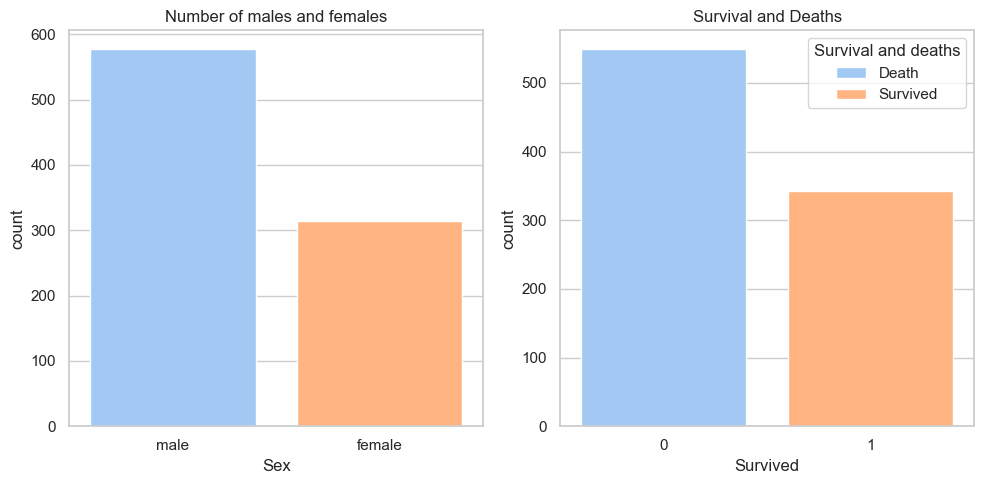

In [18]:
fig,ax=plt.subplots(1,2,figsize=(10,5))

# Number of male female
sns.countplot(x='Sex',hue='Sex',data=df,saturation=3,ax=ax[0])
ax[0].set_title("Number of males and females")

# Number of Survival and deaths
sns.countplot(x='Survived',hue='Survived',data=df,saturation=3,ax=ax[1])
ax[1].set_title("Survival and Deaths")
ax[1].legend(title='Survival and deaths', labels=['Death','Survived'])

plt.tight_layout()
plt.savefig("1. No. of male and female and survivals & Deaths.png",dpi=300)
plt.show()

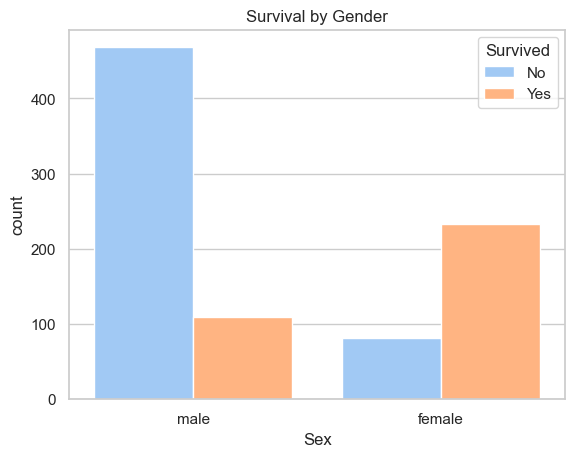

In [19]:
# Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df,saturation=3)
plt.title("Survival by Gender")
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.savefig("2. Survival by Gender.png",dpi=300)
plt.show()

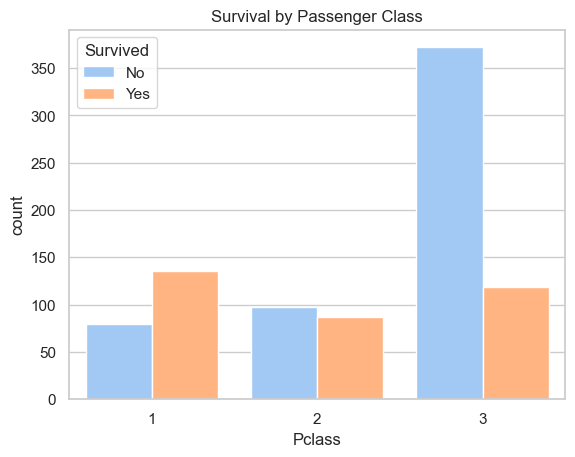

In [20]:
# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df,saturation=3)
plt.title("Survival by Passenger Class")
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.savefig("3. Survival by Passenger Class.png",dpi=300)
plt.show()

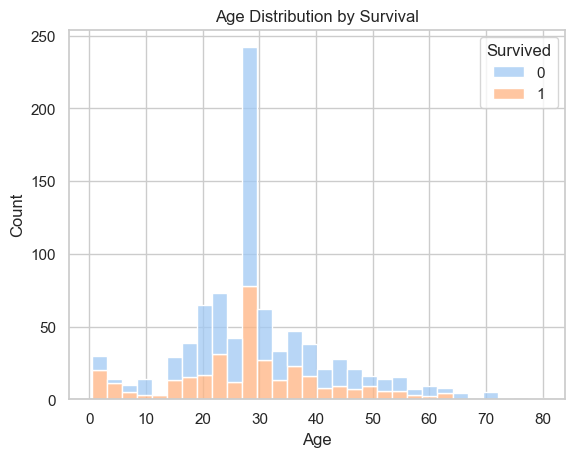

In [21]:
# Age Distribution by Survival
sns.histplot(data=df, x='Age', hue='Survived', multiple="stack", bins=30)
plt.title("Age Distribution by Survival")

plt.savefig("4. Age Distribution by Survival.png",dpi=300)
plt.show()

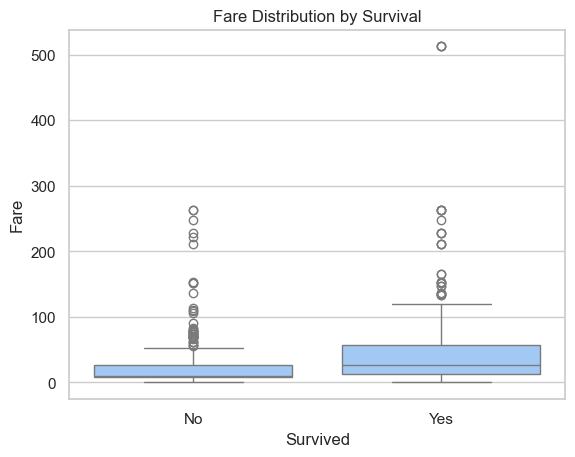

In [22]:
# Fare Distribution by Survival
sns.boxplot(x='Survived', y='Fare', data=df,saturation=3)
plt.title("Fare Distribution by Survival")
plt.xticks([0, 1], ['No', 'Yes'])  # Change 0/1 to labels

plt.savefig("5. Fare Distribution by Survival.png",dpi=300)
plt.show()

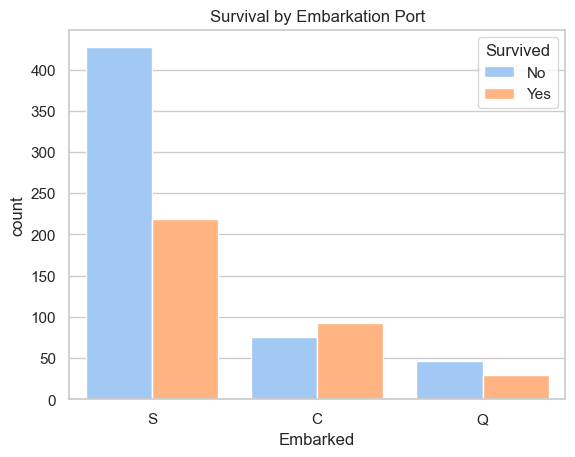

In [23]:
# Survival by Embarked Port
sns.countplot(x='Embarked', hue='Survived',data=df,saturation=3)
plt.title("Survival by Embarkation Port")
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.savefig("6. Survival by Embarkation Port.png",dpi=300)
plt.show()

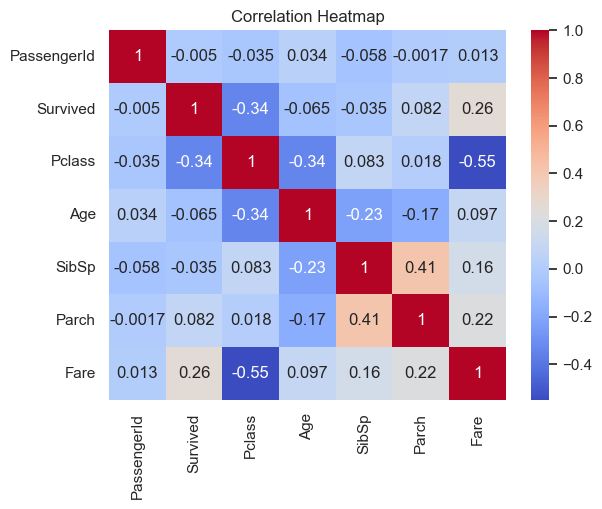

In [24]:
# Correlation Heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

plt.savefig("7. Correlation Heatmap.png",dpi=300)
plt.show()